In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

#import file
file_name = '/Users/suzybai/Downloads/casestudy.csv'
df = pd.read_csv(file_name,low_memory=False)


In [8]:
df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [10]:
#total revenue for current year
df.loc[df['year'] == 2017, 'net_revenue'].sum()

31417495.030000016

In [24]:
#new customer revenue
#2017 customers not show in 2016 coumers

##df of 2016 and 2017
df1617 = df[(df['year'] == 2017) | (df['year'] == 2016)]
df1617 #454633 rows × 4 columns

#repeating/new customers counts
counts = df1617['customer_email'].value_counts()

#only keep customers who exist once
df1617_once = df1617[df1617['customer_email'].isin(counts.index[counts == 1])]
df1617_once #412715 rows × 4 columns

#total revenue of new customers in 2017 
newc_rev_17 = df1617_once.loc[df1617_once['year'] == 2017, 'net_revenue'].sum()

##df of 2016 and 2015
df1615 = df[(df['year'] == 2015) | (df['year'] == 2016)]
df1615 #435940 rows × 4 columns

#repeating/new customers counts
counts = df1615['customer_email'].value_counts()

#only keep customers who exist once
df1615_once = df1615[df1615['customer_email'].isin(counts.index[counts == 1])]
df1615_once #316772 rows × 4 columns

#total revenue of new customers in 2016
newc_rev_16 = df1615_once.loc[df1615_once['year'] == 2016, 'net_revenue'].sum()

newc_rev_17 + newc_rev_16

47021726.05

In [12]:
#Existing customer growth
#customers who exsit 3 times: Rev17 - Rev16

#customer counts
counts = df['customer_email'].value_counts()

#only keep customers who exist 3 times
df_3time = df[df['customer_email'].isin(counts.index[counts == 3])]
df_3time #18486 rows × 4 columns

#revenue of each year
rev3_17 = df_3time.loc[df_3time['year'] == 2017, 'net_revenue'].sum()
rev3_16 = df_3time.loc[df_3time['year'] == 2016, 'net_revenue'].sum()

rev3_17-rev3_16

-8140.069999999949

In [13]:
#revenue lost from attrition
rev17 = df.loc[df['year'] == 2017, 'net_revenue'].sum()
rev16 = df.loc[df['year'] == 2016, 'net_revenue'].sum()
rev17 - rev16

5686551.440000016

In [14]:
#Existing customer revenue current year
rev3_17

764387.7300000001

In [15]:
#Existing customer revenue prior year
rev3_16

772527.8

In [16]:
#total customer current year
df17 = df[df['year'] == 2017]
len(df17)

249987

In [17]:
#total customer previous year
df16 = df[df['year'] == 2016]
len(df16)

204646

In [18]:
#new customer
#only exsit once and 2017 customer
dfnew = df1617_once[df1617_once['year'] == 2017]
len(dfnew)

229028

In [20]:
#old customer
#only exsit once and not 2017 customer

#repeating/new customers counts
counts = df['customer_email'].value_counts()

#only keep customers who exist once
df_once = df[df['customer_email'].isin(counts.index[counts == 1])]
df_once #412715 rows × 4 columns

#not in 2017
dfold = df_once[df_once['year'] != 2017]
len(dfold)

301209

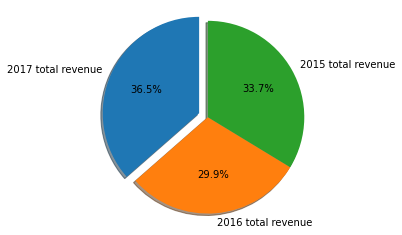

In [21]:
#plot 1
#total revenue of each year
tol_rev17 = df.loc[df['year'] == 2017, 'net_revenue'].sum()
tol_rev16 = df.loc[df['year'] == 2016, 'net_revenue'].sum()
tol_rev15 = df.loc[df['year'] == 2015, 'net_revenue'].sum()
# Pie chart
labels = '2017 total revenue', '2016 total revenue', '2015 total revenue', 
sizes = [tol_rev17, tol_rev16, tol_rev15]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

the total revenue of 2017 is the highest, but the total revenue in these three years are quite even

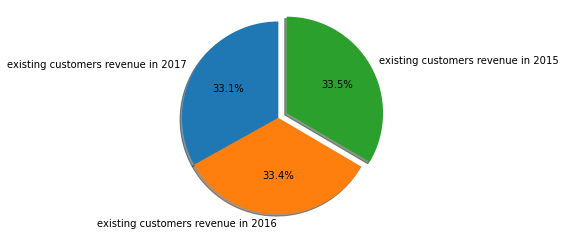

In [22]:
#plot 2

#total revenue of existing customers in each year
rev3_17 = df_3time.loc[df_3time['year'] == 2017, 'net_revenue'].sum()
rev3_16 = df_3time.loc[df_3time['year'] == 2016, 'net_revenue'].sum()
rev3_15 = df_3time.loc[df_3time['year'] == 2015, 'net_revenue'].sum()
# Pie chart
labels = 'existing customers revenue in 2017', 'existing customers revenue in 2016', 'existing customers revenue in 2015', 
sizes = [rev3_17, rev3_16, rev3_15]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Existing customer revenue are very even in these three years, there's no significant increase or decrease, proves the business stability

In [25]:
#plot3
dfnew16 = df1615_once[df1615_once['year'] == 2016]
len(dfnew16)

old17 = 249987-229028
old17
old16 = 204646-145062
old16

59584

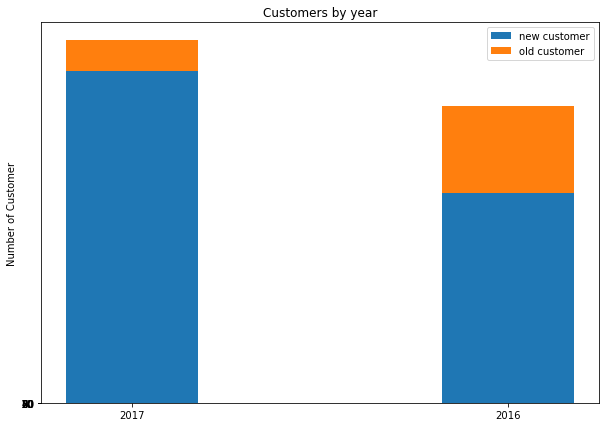

In [26]:
N = 2
 
new = (229028, 145062)
old = (20959, 59584)

ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, new, width)
p2 = plt.bar(ind, old, width,
             bottom = new)
 
plt.ylabel('Number of Customer')
plt.title('Customers by year')
plt.xticks(ind, ('2017', '2016'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('new customer', 'old customer'))
 
plt.show()


customers increased a lot from 2016 to 2017, new customers increased significantly but old customers have also lost a lot

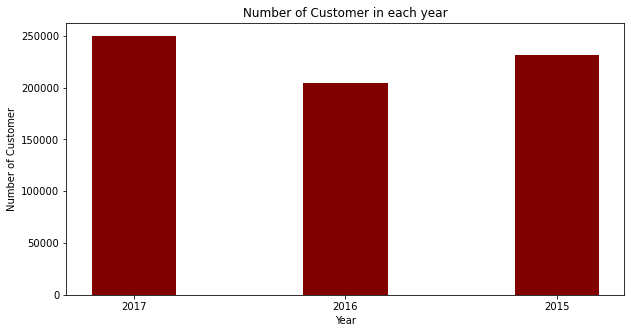

In [29]:
#plot4
  
# creating the dataset
data = {'2017':249987, '2016':204646, '2015':231294}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Number of Customer")
plt.title("Number of Customer in each year")
plt.show()

Customers lost from 2015 to 2016 but increased significantly from 2016 to 2017. An interesting observation is that although a lot of customers lost in 2016, the toal revenue did not suffer lots of loss and the existing customer were not affected